# Data preparation and EDA

## Importing libraries

In [1]:
import sys
import os
# Add the root directory (parent of notebooks) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.load_data import load_brent_data
from scripts.preprocess import clean_prices, check_missing
from scripts.visualizations import plot_price
from scripts.time_series_utils import adf_test

##  Load and clean

In [7]:
df = load_brent_data("../data/BrentOilPrices.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)
df = clean_prices(df)
print(check_missing(df))

        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None
                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110
(9011, 2)
Date     0
Price    0
dtype: int64


## plot

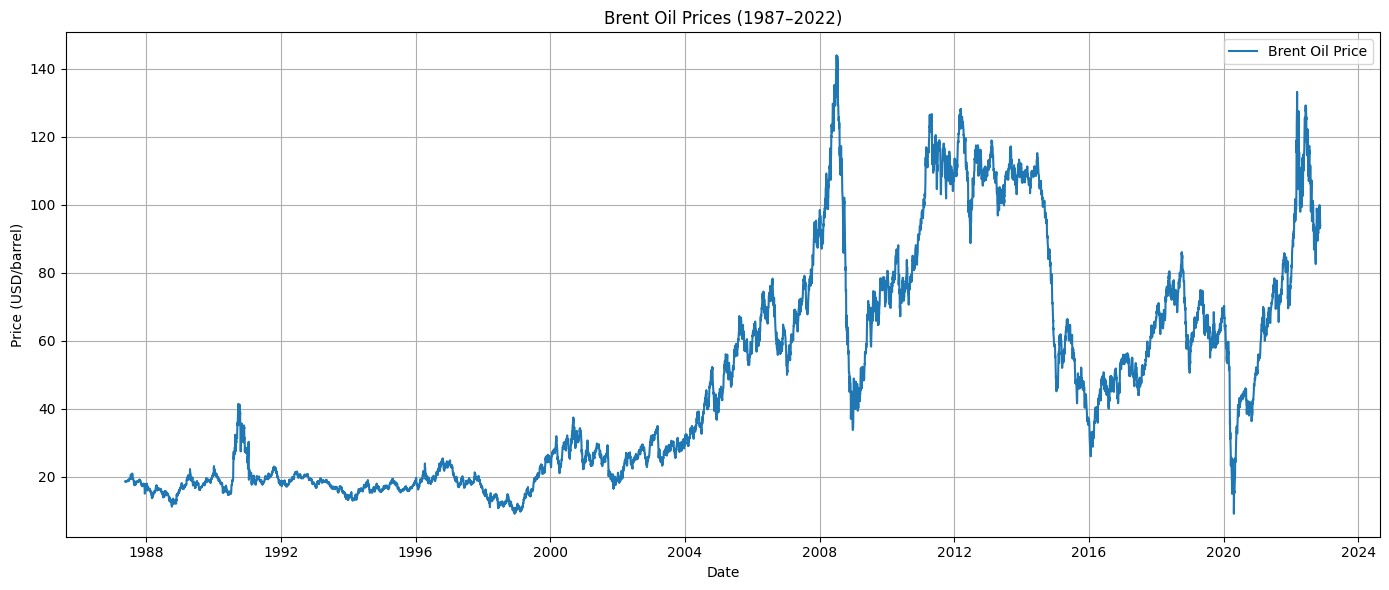

In [3]:
plot_price(df)

## Test for stationarity

In [4]:
print(adf_test(df['Price']))

{'ADF Statistic': np.float64(-1.9938560113924675), 'p-value': np.float64(0.28927350489340287), 'Used lags': 29, 'Number of observations': 8981, 'Critical Values': {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}}


## Since the series is non-stationary

Difference the series (i.e., subtract the current price from the previous one) to remove trend:

In [5]:
df['price_diff'] = df['Price'].diff().dropna()
print(adf_test(df['price_diff'].dropna()))

{'ADF Statistic': np.float64(-15.52936758004806), 'p-value': np.float64(2.2307405105160745e-28), 'Used lags': 28, 'Number of observations': 8981, 'Critical Values': {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}}
